# Notebook #3: Gestión de Outliers

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_nulos as sn
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior y lo comprobamos.

In [2]:
df = pd.read_csv("../../datos/modelo3/csv_encoded.csv", index_col=0)
df.sample(2)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
208,694.0,697.554348,81.0,1,697.968750,677.594595,693.909046,20294,670.111111,1
27,750.0,689.625000,25.0,0,690.857143,694.538217,705.633136,533,715.606061,1


## Outliers multivariados

- Los outliers multivariados se identifican considerando las relaciones y dependencias entre dos o más variables, en este caso, tenemos size y distance, con lo cual, tendremos que usar Isolation Forest o Local Outlier Factor.

- Sabemos que el formato CSV no guarda tipos de datos, con lo cual, debemos transformar las columnas con encoding a string, debido a que la gestión de outliers es, naturalmente, sobre numéricas.

In [3]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'],
      dtype='object')

In [6]:
df[['propertyType', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'floor', 'hasLift']] = df[['propertyType', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'floor', 'hasLift']].astype(str)

- Recordemos nuestros outliers con la ayuda del boxplot:

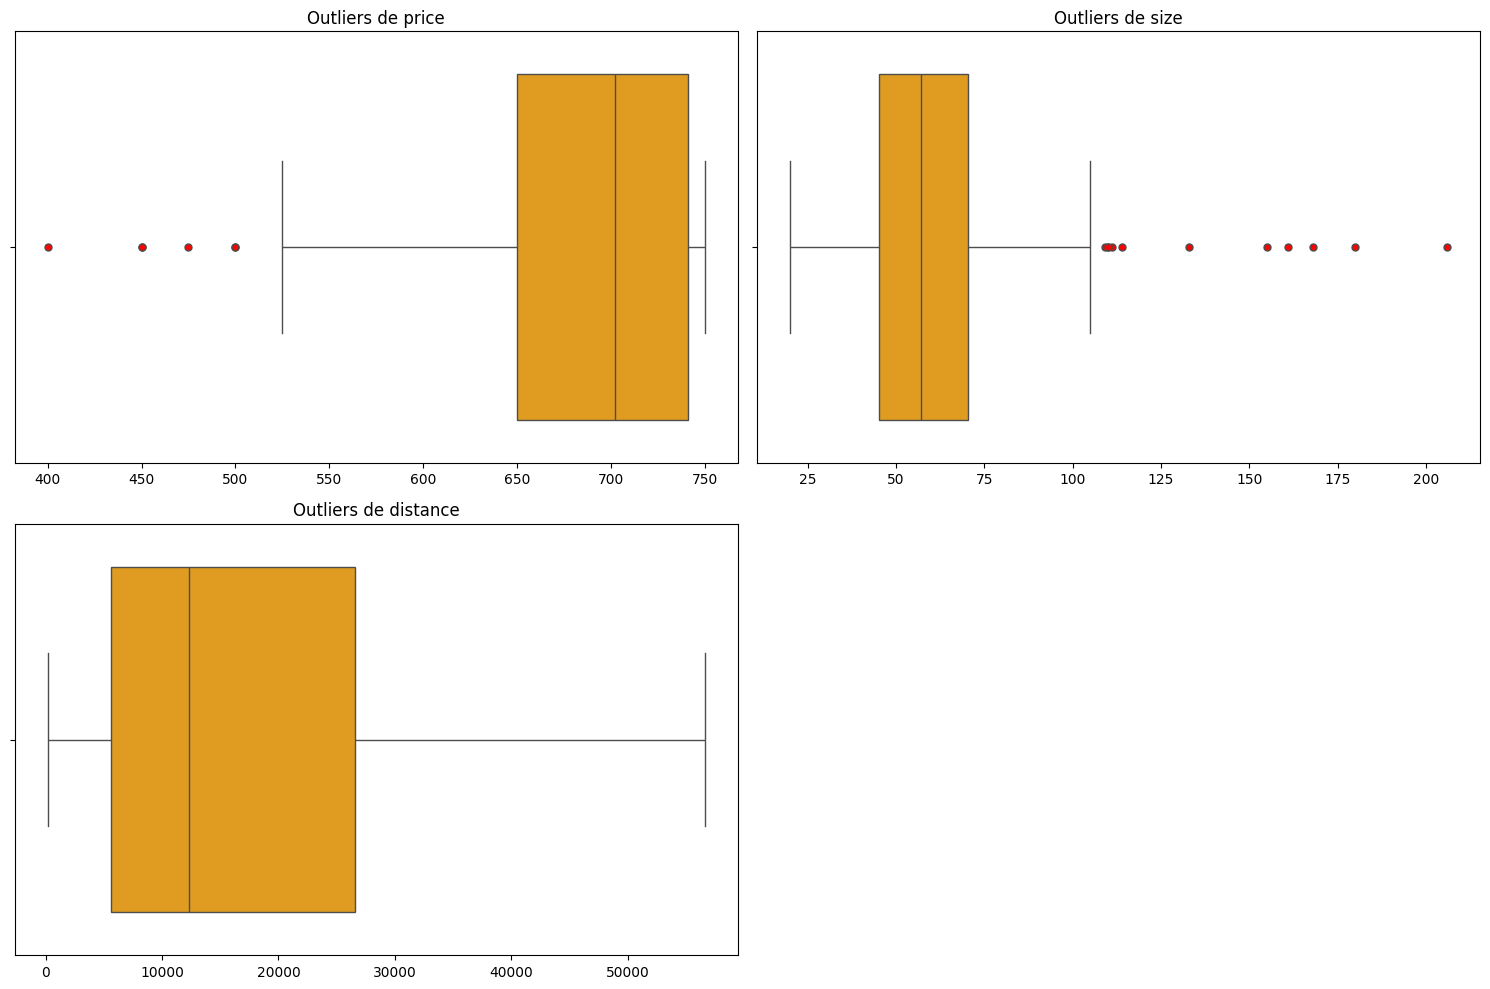

In [7]:
sp.detectar_outliers(df)

- Tras el filtro aplicado en el EDA (Notebook #1), podemos ver que son escasos y claramente diferentes. La elección entre Local Outlier Factor (LOF) y Isolation Forest (IF) depende del contexto de los datos y el problema que deseamos resolver.

- En este caso, para gestionar los nulos, usaremos el Isolation Forest, debido a que tenemos datos atípicos raros y claramente diferentes al resto de los datos.

In [8]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

sn.outliers_isolation_forest(df, contaminacion, estimadores)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,750.0,697.554347826087,60.0,1,682.5166666666667,694.5382165605096,705.6331360946746,7037,697.9574468085107,1,1,1,1,1,1,1
1,750.0,697.554347826087,70.0,1,697.96875,694.5382165605096,735.546085805312,16145,678.3448275862069,0,1,1,1,1,1,1
2,400.0,619.9090096269214,67.0,1,697.96875,677.5945945945946,546.4573863636364,55041,696.1785714285714,0,-1,-1,-1,-1,-1,-1
3,590.0,697.554347826087,70.0,1,705.2307692307693,677.5945945945946,641.4573863636364,56596,670.1111111111111,0,1,1,1,-1,1,-1
4,684.0,689.625,45.0,1,690.8571428571429,694.5382165605096,705.6331360946746,10656,670.1111111111111,-1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,640.0,697.554347826087,69.0,1,697.96875,694.5382165605096,666.4573863636364,29311,696.1785714285714,1,1,1,1,1,1,1
348,700.0,697.554347826087,54.0,1,682.5166666666667,694.5382165605096,704.998508748505,11656,701.7571428571429,1,1,1,1,1,1,1
349,700.0,697.554347826087,59.0,1,682.5166666666667,694.5382165605096,705.6331360946746,7529,716.3709533722933,1,1,1,1,1,1,1
350,700.0,697.554347826087,75.0,1,697.96875,694.5382165605096,705.0909090816765,30359,701.7571428571429,0,1,1,1,1,1,1


In [9]:
col_numericas

Index(['price', 'size', 'distance'], dtype='object')

- Visualizaremos ahora nuestros outliers.

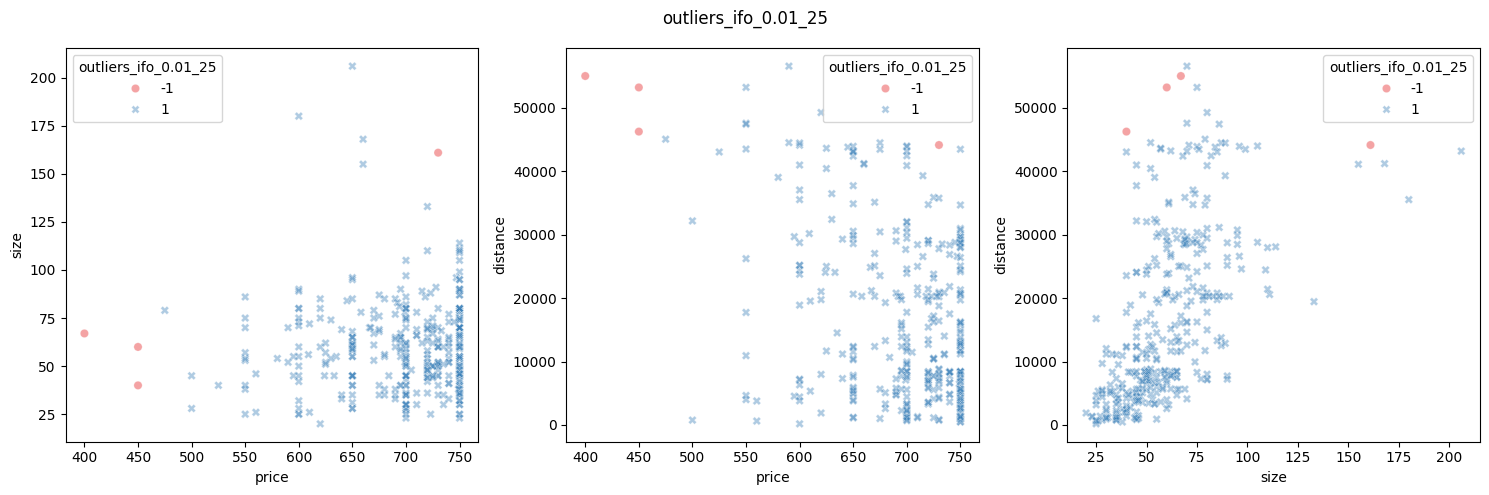

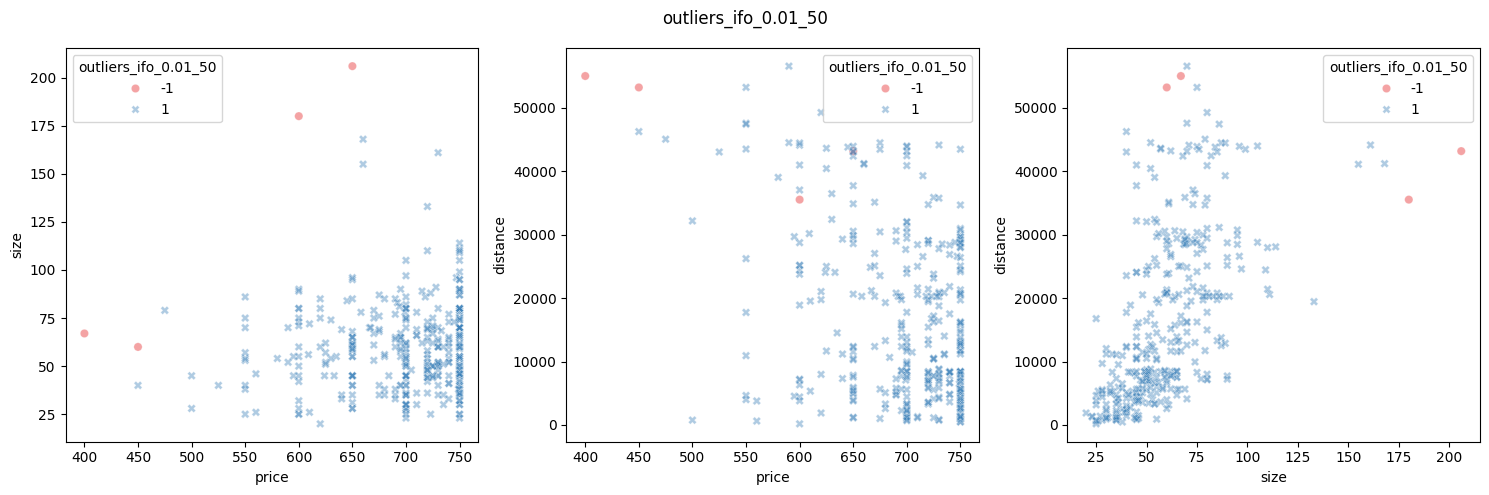

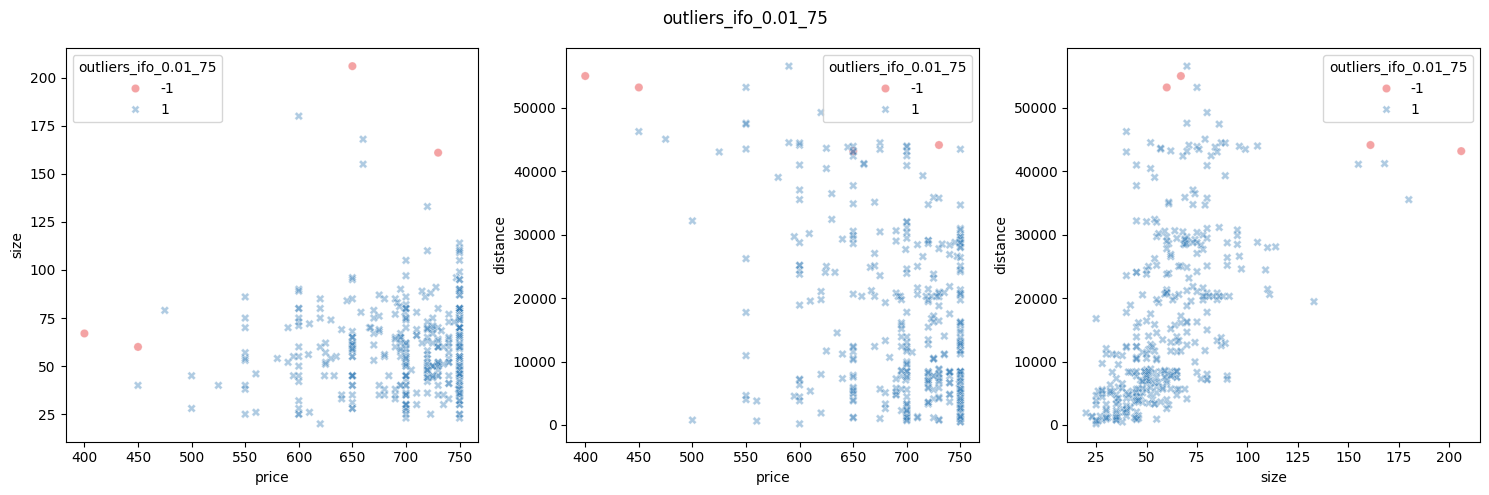

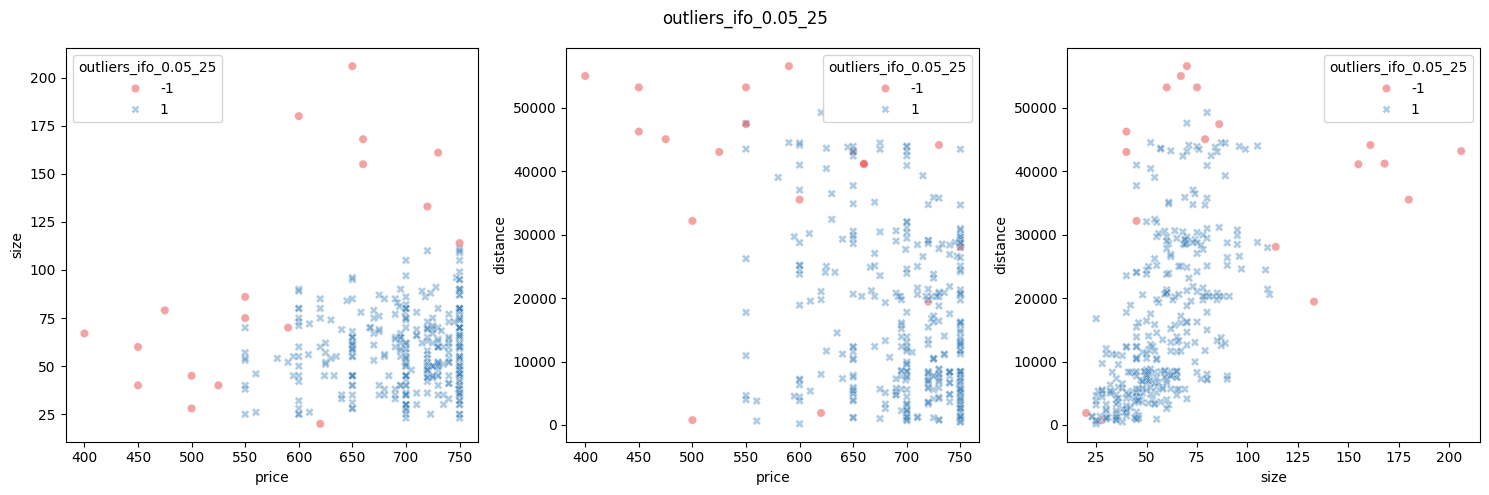

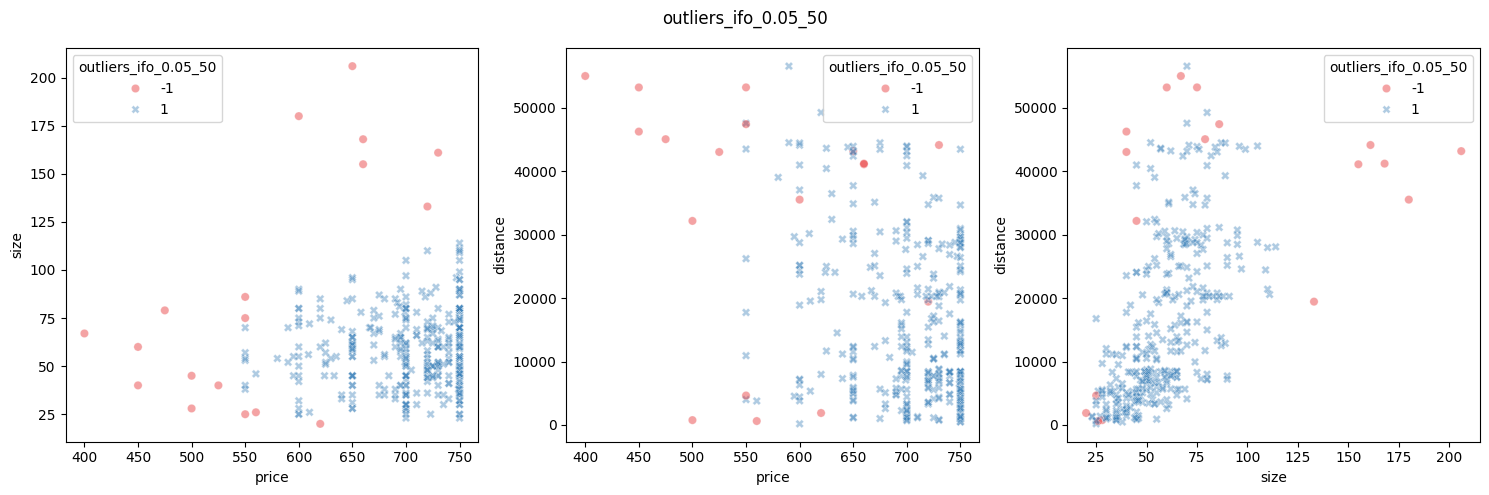

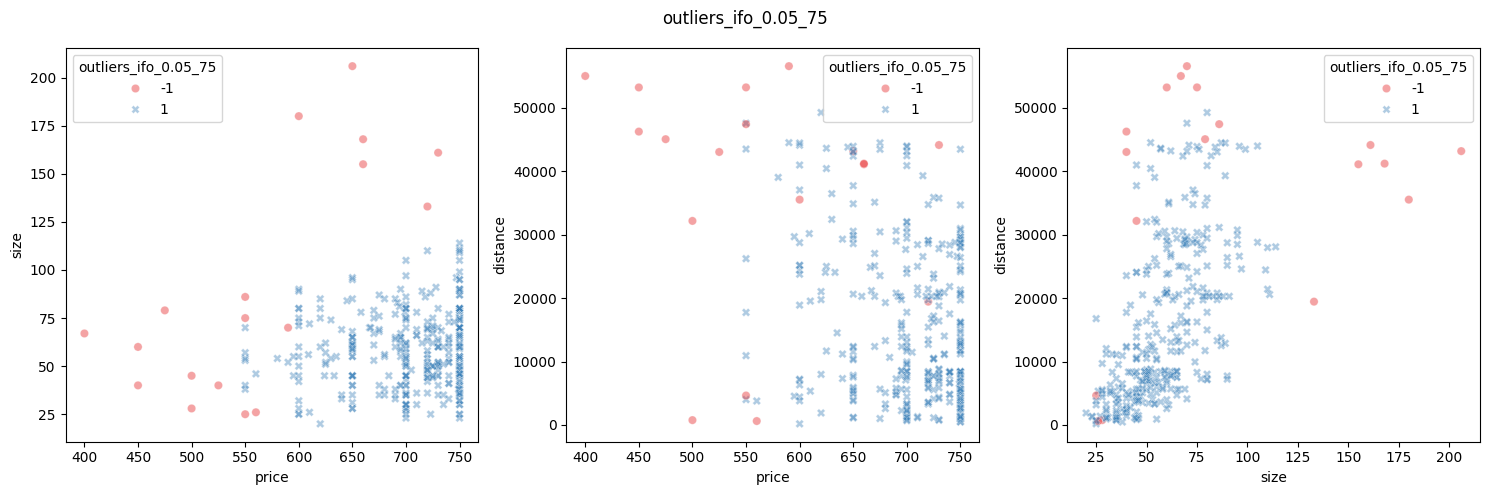

In [10]:
sn.visualizar_outliers(df, col_numericas)

Consideraremos outliers aquellas filas que contengan más de 70% de nulos, en este caso, si tenemos 6 columnas de outliers, que serían 4.

In [11]:
cantidad_col = 4
df_filtrado = df[(df == -1).sum(axis=1) > cantidad_col]
df_filtrado

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
2,400.0,619.9090096269214,67.0,1,697.96875,677.5945945945946,546.4573863636364,55041,696.1785714285714,0,-1,-1,-1,-1,-1,-1
18,650.0,619.8836831878907,206.0,0,705.2307692307693,694.5382165605096,670.6797922079181,43195,670.1111111111111,-1,1,-1,-1,-1,-1,-1
186,450.0,619.9090096269214,60.0,1,682.5166666666667,694.5382165605096,551.8827731805424,53238,670.1111111111111,0,-1,-1,-1,-1,-1,-1
225,730.0,697.554347826087,161.0,1,710.8993812456052,694.5382165605096,654.092671611573,44159,697.9574468085107,0,-1,1,-1,-1,-1,-1


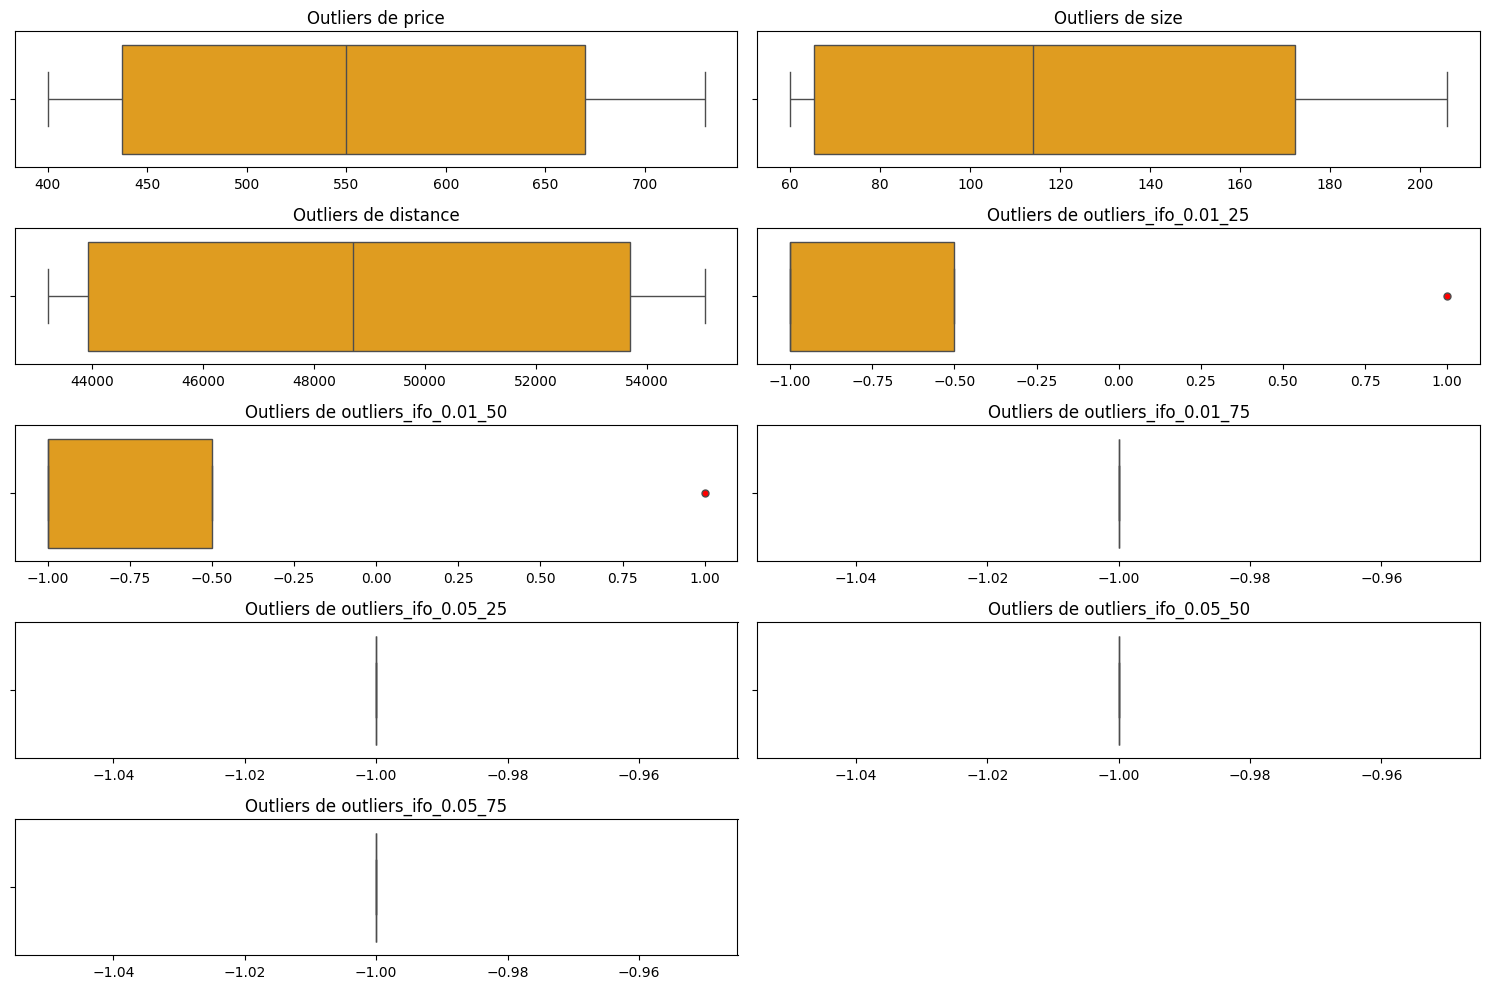

In [12]:
sp.detectar_outliers(df_filtrado)

- En este caso, tenemos únicamente 3 outliers. En esta segunda iteración, no sustituiremos por la mediana, sino que eliminaremos directamente esos valores.

In [13]:
df[~((df == -1).sum(axis=1) > cantidad_col)]

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,750.0,697.554347826087,60.0,1,682.5166666666667,694.5382165605096,705.6331360946746,7037,697.9574468085107,1,1,1,1,1,1,1
1,750.0,697.554347826087,70.0,1,697.96875,694.5382165605096,735.546085805312,16145,678.3448275862069,0,1,1,1,1,1,1
3,590.0,697.554347826087,70.0,1,705.2307692307693,677.5945945945946,641.4573863636364,56596,670.1111111111111,0,1,1,1,-1,1,-1
4,684.0,689.625,45.0,1,690.8571428571429,694.5382165605096,705.6331360946746,10656,670.1111111111111,-1,1,1,1,1,1,1
5,600.0,697.554347826087,73.0,1,697.96875,694.5382165605096,646.4573863636364,37062,697.9574468085107,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,640.0,697.554347826087,69.0,1,697.96875,694.5382165605096,666.4573863636364,29311,696.1785714285714,1,1,1,1,1,1,1
348,700.0,697.554347826087,54.0,1,682.5166666666667,694.5382165605096,704.998508748505,11656,701.7571428571429,1,1,1,1,1,1,1
349,700.0,697.554347826087,59.0,1,682.5166666666667,694.5382165605096,705.6331360946746,7529,716.3709533722933,1,1,1,1,1,1,1
350,700.0,697.554347826087,75.0,1,697.96875,694.5382165605096,705.0909090816765,30359,701.7571428571429,0,1,1,1,1,1,1


In [14]:
df = df[~((df == -1).sum(axis=1) > cantidad_col)]

- A pesar de haber hecho una criba inicial en los tamaños de las casas y los precios, vemos todavía ruido en las gráficas por encima de 100m2, así que, acotaremos aún más el modelo y nos quedaremos con aquellas por debajo de ese valor. Son, en este caso, 7 viviendas.

In [15]:
df[df["size"] > 100]

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
19,700.0,697.554347826087,105.0,1,705.2307692307693,677.5945945945946,654.092671611573,44003,678.3448275862069,0,1,1,1,1,1,1
55,720.0,697.554347826087,133.0,0,705.2307692307693,677.5945945945946,671.0867531052564,19453,701.7571428571429,1,1,1,1,-1,-1,-1
175,750.0,697.554347826087,111.0,1,697.96875,677.5945945945946,705.499971553305,20583,716.3709533722933,1,1,1,1,1,1,1
191,660.0,697.554347826087,155.0,0,705.2307692307693,677.5945945945946,654.092671611573,41119,670.1111111111111,-1,1,1,1,-1,-1,-1
195,660.0,697.554347826087,168.0,0,710.8993812456052,677.5945945945946,654.092671611573,41221,697.9574468085107,1,1,1,1,-1,-1,-1
226,720.0,697.554347826087,110.0,0,697.96875,694.5382165605096,705.499971553305,21417,670.1111111111111,1,1,1,1,1,1,1
248,600.0,619.8836831878907,180.0,0,705.2307692307693,677.5945945945946,646.4573863636364,35543,670.1111111111111,-1,1,-1,1,-1,-1,-1
249,750.0,697.554347826087,109.0,1,697.96875,677.5945945945946,661.0789132060843,24455,697.9574468085107,1,1,1,1,1,1,1
256,750.0,697.554347826087,105.0,1,705.2307692307693,694.5382165605096,734.6474178380435,28810,701.7571428571429,0,1,1,1,1,1,1
318,750.0,689.2857224885634,114.0,1,705.2307692307693,721.4573863636364,721.4573863636364,28099,701.7571428571429,0,1,1,1,-1,1,1


- Aplicamos el filtro:

In [16]:
df = df[df["size"] < 100]

- Eliminamos todas las columnas de outliers generadas por el Isolation Forest.

In [17]:
df.drop(columns=['outliers_ifo_0.01_25', 'outliers_ifo_0.01_50',
       'outliers_ifo_0.01_75', 'outliers_ifo_0.05_25', 'outliers_ifo_0.05_50',
       'outliers_ifo_0.05_75'], inplace=True)

In [18]:
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,697.554347826087,60.0,1,682.5166666666667,694.5382165605096,705.6331360946746,7037,697.9574468085107,1
1,750.0,697.554347826087,70.0,1,697.96875,694.5382165605096,735.546085805312,16145,678.3448275862069,0
3,590.0,697.554347826087,70.0,1,705.2307692307693,677.5945945945946,641.4573863636364,56596,670.1111111111111,0
4,684.0,689.625,45.0,1,690.8571428571429,694.5382165605096,705.6331360946746,10656,670.1111111111111,-1
5,600.0,697.554347826087,73.0,1,697.96875,694.5382165605096,646.4573863636364,37062,697.9574468085107,0


In [19]:
df.shape

(337, 10)

- Guardamos el DF que pasará al paso #4 del preprocesamiento, donde realizaremos la Estandarización de las variables numéricas.

In [20]:
df.to_csv("../../datos/modelo3/csv_sin_outliers.csv")